In [ ]:
''' @author: Guilherme Silva Garcia
    Análise de dados INEP: Ingressantes Indígenas em Universidades do Brasil;
    Anos de referência: 2009 até 2018;
    Dados extraídos do site:
    http://portal.inep.gov.br/microdados
'''

In [1]:
# Importando bibliotecas utilizadadas 

import pandas as pd
import matplotlib.pyplot as plt

low_memory = False

In [2]:
# Declaração de variáveis e função

# Essa função retorna a contagem de duas colunas de acordo com os operadores utilizados.
def contabilizar(coluna, operador, condição, lógico, coluna2, operador2, condição2):
    resultado = df.query(f'{coluna} {operador} {condição} {lógico} {coluna2} {operador2} {condição2}')[f'{coluna}'].count()
    return resultado

# Anos utilizados na análise
anos = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]  

# Variáveis utilziadas para o primeiro gráfico: 'Evolução: Indígenas ingressantes em Universidades no Brasil.'
total_indigenas = []  
dados_federal = []
dados_estadual = []
dados_municipal = []
dados_privada = []    # *Apenas universidades privadas com fins lucrativos.


# Variáveis utilizadas para o segundo gráfico: 'Comparação entre Etnias de Ingressantes em Universidades Brasileiras.'
indigenas = []
negros = []
pardos = []
brancos = [] 
amarelos = []



# Colunas utilizadas na Análise: Categoria Administrativa e Coluna de Etnia.
coluna_adm = 'CO_CATEGORIA_ADMINISTRATIVA'
coluna_etnia = 'CO_COR_RACA_ALUNO'

In [3]:
# Leitura dos arquivos e criação do Data Frame
for ano in anos:
    if ano > 2016:  # As colunas dos arquivos anteriores a 2016 possuem nomes diferentes em relação aos demais arquvios.
        coluna_adm = 'TP_CATEGORIA_ADMINISTRATIVA' 
        coluna_etnia = 'TP_COR_RACA'
    df = pd.read_csv(f'C:\Dados Inep\{ano}\DM_ALUNO.csv', sep = '|', encoding = 'ANSI', usecols = [f'{coluna_adm}',f'{coluna_etnia}'])
    
    
    # Contabilizando ingressantes Indígenas em Universidades Federais
    federal = contabilizar(coluna_etnia, '==', '5', 'and', coluna_adm, '==', '1') 
    dados_federal.append(federal)
    
    # Contabilizando ingressantes Indígenas em Universidades Estaduais
    estadual = contabilizar(coluna_etnia, '==', '5', 'and', coluna_adm, '==', '2')
    dados_estadual.append(estadual)
    
    # Contabilizando ingressantes Indígenas em Universidades Municipais
    municipal = contabilizar(coluna_etnia, '==', '5', 'and', coluna_adm, '==', '3')
    dados_municipal.append(municipal)
    
    # Contabilizando ingressantes Indígenas em Universidades Privadas
    privada = contabilizar(coluna_etnia, '==', '5', 'and', coluna_adm, '==', '4')
    dados_privada.append(privada)
    
    # Contabilizando o total de ingressantes Indígenas
    total = (federal) + (estadual) + (municipal) + (privada)
    total_indigenas.append(total)

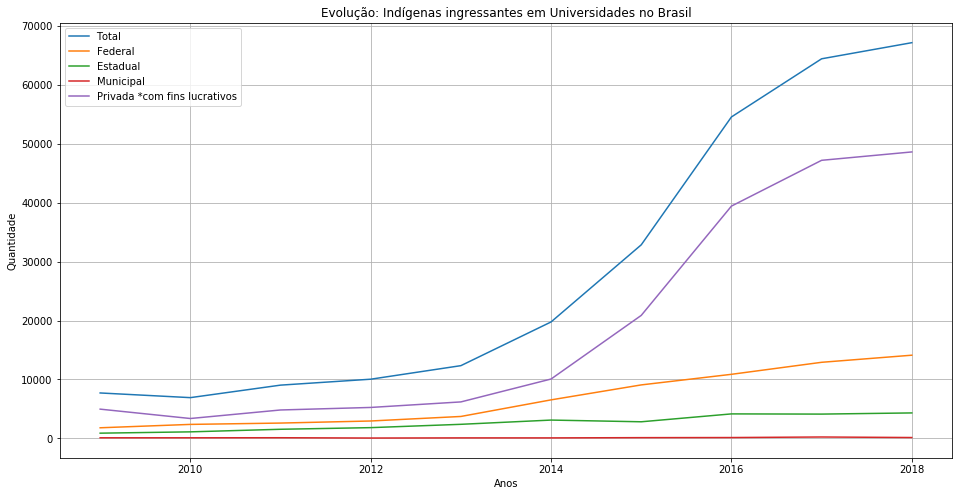

In [8]:
# Plotar primeiro gráfico
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (16, 8)   # Tamanho do gráfico
ax.plot(anos, total_indigenas, label='Total')
ax.plot(anos, dados_federal, label='Federal')
ax.plot(anos, dados_estadual, label='Estadual')
ax.plot(anos, dados_municipal, label='Municipal')
ax.plot(anos, dados_privada, label='Privada *com fins lucrativos')
ax.grid()
plt.legend()
plt.title('Evolução: Indígenas ingressantes em Universidades no Brasil')
plt.xlabel('Anos')
plt.ylabel('Quantidade')
plt.show()

In [5]:
# Para o segundo gráfico foi criado um novo Data Frame apenas para o ano de 2018
# Foi necessário atribuir novamente o nome da coluna devido a diferença entre os nomes das colunas durante os anos.
coluna_adm = 'TP_CATEGORIA_ADMINISTRATIVA'
coluna_etnia = 'TP_COR_RACA'

df2018 = pd.read_csv(f'C:\Dados Inep\{anos[-1]}\DM_ALUNO.csv', sep = '|', encoding = 'ANSI', usecols = [f'{coluna_adm}',f'{coluna_etnia}'])

# Contabilização do total de ingressantes por etnia.
brancos.append(df2018.query('(TP_COR_RACA == 1) and (TP_CATEGORIA_ADMINISTRATIVA == 1 | TP_CATEGORIA_ADMINISTRATIVA == 2 | TP_CATEGORIA_ADMINISTRATIVA == 3 | TP_CATEGORIA_ADMINISTRATIVA == 4)')['TP_COR_RACA'].count())
negros.append(df2018.query('(TP_COR_RACA == 2) and (TP_CATEGORIA_ADMINISTRATIVA == 1 | TP_CATEGORIA_ADMINISTRATIVA == 2 | TP_CATEGORIA_ADMINISTRATIVA == 3 | TP_CATEGORIA_ADMINISTRATIVA == 4)')['TP_COR_RACA'].count())
pardos.append(df2018.query('(TP_COR_RACA == 3) and (TP_CATEGORIA_ADMINISTRATIVA == 1 | TP_CATEGORIA_ADMINISTRATIVA == 2 | TP_CATEGORIA_ADMINISTRATIVA == 3 | TP_CATEGORIA_ADMINISTRATIVA == 4)')['TP_COR_RACA'].count())
amarelos.append(df2018.query('(TP_COR_RACA == 4) and (TP_CATEGORIA_ADMINISTRATIVA == 1 | TP_CATEGORIA_ADMINISTRATIVA == 2 | TP_CATEGORIA_ADMINISTRATIVA == 3 | TP_CATEGORIA_ADMINISTRATIVA == 4)')['TP_COR_RACA'].count())
indigenas.append(df2018.query('(TP_COR_RACA == 5) and (TP_CATEGORIA_ADMINISTRATIVA == 1 | TP_CATEGORIA_ADMINISTRATIVA == 2 | TP_CATEGORIA_ADMINISTRATIVA == 3 | TP_CATEGORIA_ADMINISTRATIVA == 4)')['TP_COR_RACA'].count())


In [6]:
# Organizando eixo x e y para plotar o gráfico
eixo_y_quantidade = [brancos[0], negros[0], pardos[0], amarelos[0], indigenas[0]]
eixo_y_quantidade.sort()
eixo_x_etnias = ['Indígenas', 'Amarelos', 'Negros', 'Pardos', 'Brancos']
print(f'5-Brancos = {brancos}, 3-Negros = {negros}, 2-Amarelos = {amarelos}, 4-Pardos = {pardos}, 1-Indígenas = {indigenas}')

5-Brancos = [3307922], 3-Negros = [651016], 2-Amarelos = [151830], 4-Pardos = [2656299], 1-Indígenas = [67194]


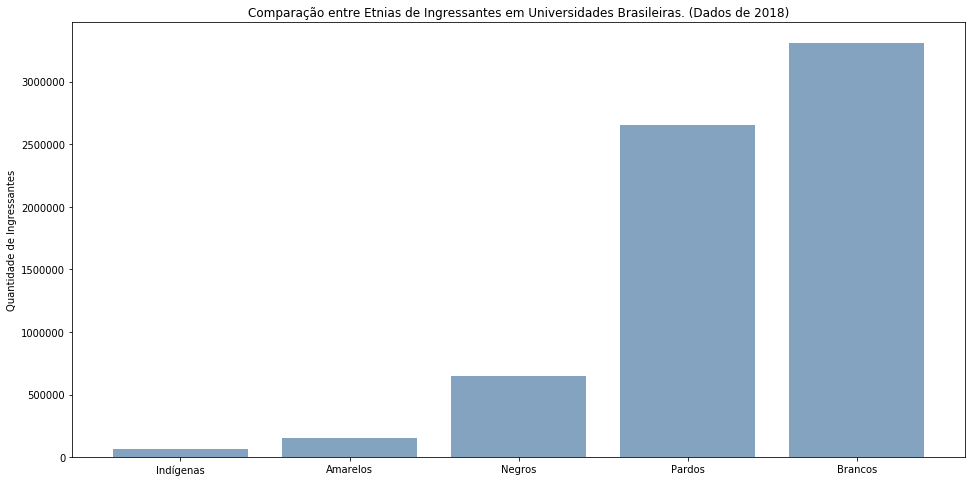

In [7]:
# Plotando segundo gráfico
plt.bar(eixo_x_etnias, eixo_y_quantidade, color=(0.2, 0.4, 0.6, 0.6))
plt.title('Comparação entre Etnias de Ingressantes em Universidades Brasileiras. (Dados de 2018)')
plt.rcParams['figure.figsize'] = (16, 8)
plt.ylabel('Quantidade de Ingressantes')
plt.show()